# Konut Fiyatı Tahmini 

Bu proje, konut verileri kullanarak konut fiyatlarını tahmin etmek amacıyla geliştirilen bir makine öğrenmesi çalışmasıdır. Projede Random Forest Regressor kullanılmıştır.

## Proje Amaçları

• Konut pazarında fiyatları daha iyi anlamak ve tahmin etmek.

• Veri analizi ve makine öğrenme becerilerini geliştirmek.

• Random Forest Regressor algoritmasını anlamak ve kullanmak.

## Veri Kaynağı

Proje için kullanılan konut verileri [Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques) adresinden alınmıştır.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn import tree

In [2]:
data = pd.read_csv("sample_submission.csv")
test = pd.read_csv("test(1).csv")
train = pd.read_csv("train(1).csv")

In [3]:
data

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [4]:
sale_price = pd.DataFrame(data)

In [5]:
sale_price

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [6]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# TRAİN DEĞERLERİN TEMİZLENMESİ

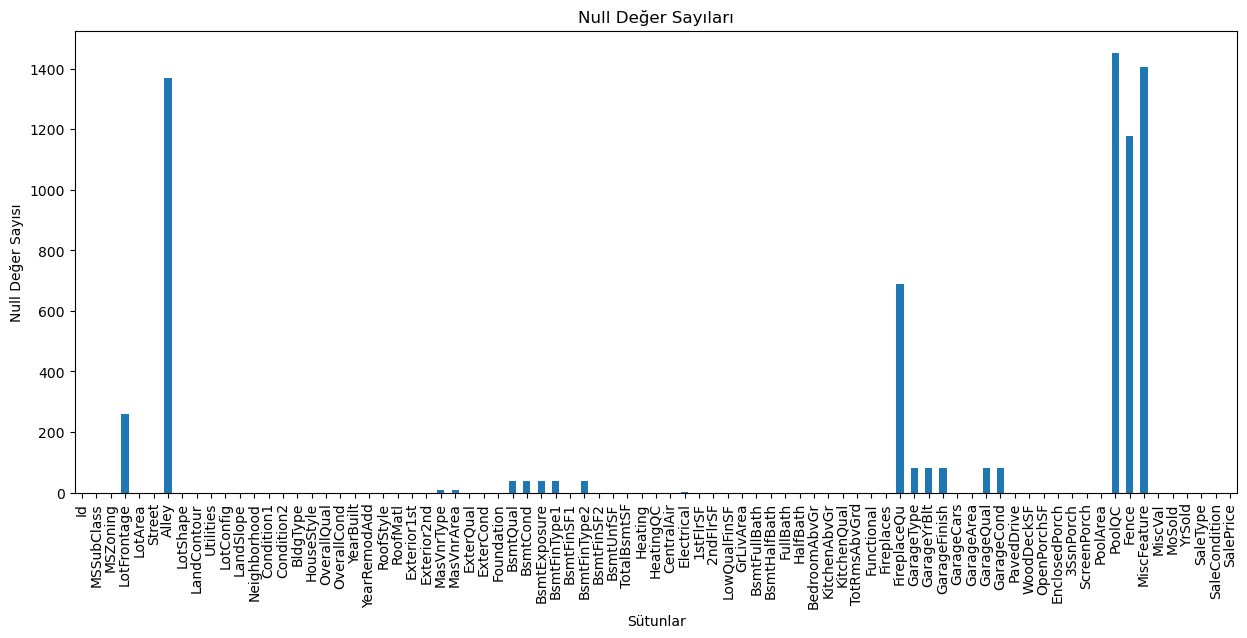

In [9]:
null_degerler_train = train.isnull().sum()
# Null değer sayılarını çubuk grafik olarak çizin
fig, ax = plt.subplots(figsize=(15, 6))
null_degerler_train.plot(kind='bar')
plt.title('Null Değer Sayıları')
plt.xlabel('Sütunlar')
plt.ylabel('Null Değer Sayısı')
plt.show()

In [10]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
train.drop(["PoolQC","MiscFeature","Fence","Alley","FireplaceQu"], axis=1, inplace=True)

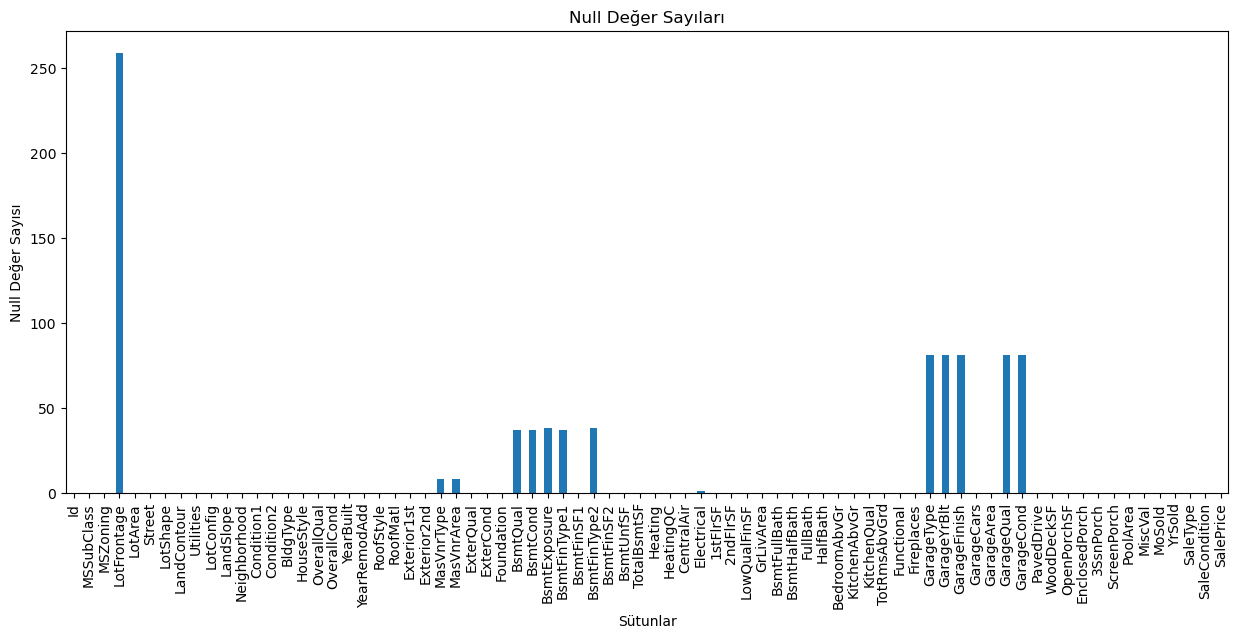

In [12]:
null_degerler_train = train.isnull().sum()
# Null değer sayılarını çubuk grafik olarak çizin
fig, ax = plt.subplots(figsize=(15, 6))
null_degerler_train.plot(kind='bar')
plt.title('Null Değer Sayıları')
plt.xlabel('Sütunlar')
plt.ylabel('Null Değer Sayısı')
plt.show()

In [13]:
null_sutunlar_train = train.columns[train.isnull().any()]
train[null_sutunlar_train].isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [14]:
ortalama_lot = train["LotFrontage"].mean()
ortalama_mas = train["MasVnrArea"].mean()
ortalama_gar = train["GarageYrBlt"].mean()
train['LotFrontage'].fillna(ortalama_lot, inplace=True)
train['MasVnrArea'].fillna(ortalama_mas, inplace=True)
train['GarageYrBlt'].fillna(ortalama_gar, inplace=True)

In [15]:
null_sutunlar_train = train.columns[train.isnull().any()]
train[null_sutunlar_train].isnull().sum()

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [16]:
train[null_sutunlar_train].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MasVnrType    1452 non-null   object
 1   BsmtQual      1423 non-null   object
 2   BsmtCond      1423 non-null   object
 3   BsmtExposure  1422 non-null   object
 4   BsmtFinType1  1423 non-null   object
 5   BsmtFinType2  1422 non-null   object
 6   Electrical    1459 non-null   object
 7   GarageType    1379 non-null   object
 8   GarageFinish  1379 non-null   object
 9   GarageQual    1379 non-null   object
 10  GarageCond    1379 non-null   object
dtypes: object(11)
memory usage: 125.6+ KB


In [17]:
train["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [18]:
null_sutunlar_train = train.columns[train.isnull().any()]
train[null_sutunlar_train].isnull().sum()

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [19]:
train["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [20]:
train["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [21]:
for i in null_sutunlar_train:
    train[i].fillna(method='ffill', inplace=True)

In [22]:
train[null_sutunlar_train].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [23]:
train.duplicated().sum()

0

In [24]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [25]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [26]:
train["SaleType"].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [27]:
train["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [28]:
tekrarlanan_kolonlar_train = []
for i in train.columns:
    en_fazla_tekrarlanan_deger = train[i].mode()[0]
    tekrarlanan_oran = train[i].value_counts(normalize=True).max()
    if tekrarlanan_oran > 0.9:
        print(f"'{i}' sütununda 0.9 oranında tekrarlanan değer: {en_fazla_tekrarlanan_deger}")
        tekrarlanan_kolonlar_train.append(i)
    elif tekrarlanan_oran > 0.8:
        print(f"'{i}' sütununda 0.8 oranında tekrarlanan değer: {en_fazla_tekrarlanan_deger}")
        tekrarlanan_kolonlar_train.append(i)

'Street' sütununda 0.9 oranında tekrarlanan değer: Pave
'LandContour' sütununda 0.8 oranında tekrarlanan değer: Lvl
'Utilities' sütununda 0.9 oranında tekrarlanan değer: AllPub
'LandSlope' sütununda 0.9 oranında tekrarlanan değer: Gtl
'Condition1' sütununda 0.8 oranında tekrarlanan değer: Norm
'Condition2' sütununda 0.9 oranında tekrarlanan değer: Norm
'BldgType' sütununda 0.8 oranında tekrarlanan değer: 1Fam
'RoofMatl' sütununda 0.9 oranında tekrarlanan değer: CompShg
'ExterCond' sütununda 0.8 oranında tekrarlanan değer: TA
'BsmtCond' sütununda 0.9 oranında tekrarlanan değer: TA
'BsmtFinType2' sütununda 0.8 oranında tekrarlanan değer: Unf
'BsmtFinSF2' sütununda 0.8 oranında tekrarlanan değer: 0
'Heating' sütununda 0.9 oranında tekrarlanan değer: GasA
'CentralAir' sütununda 0.9 oranında tekrarlanan değer: Y
'Electrical' sütununda 0.9 oranında tekrarlanan değer: SBrkr
'LowQualFinSF' sütununda 0.9 oranında tekrarlanan değer: 0
'BsmtHalfBath' sütununda 0.9 oranında tekrarlanan değer: 0
'K

In [29]:
tekrarlanan_kolonlar_train

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SaleType',
 'SaleCondition']

In [30]:
values_to_remove=["Condition1","BldgType","ExterCond","BsmtCond","BsmtFinSF2","Heating","CentralAir","Functional","GarageQual","GarageCond","MiscVal","SaleType","SaleCondition"]
tekrarlanan_kolonlar_train = [value for value in tekrarlanan_kolonlar_train if value not in values_to_remove]
print(tekrarlanan_kolonlar_train)

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtFinType2', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']


In [31]:
train = train.drop(tekrarlanan_kolonlar_train, axis = 1)

In [32]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [33]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,...,TA,TA,0,61,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,...,TA,TA,298,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,...,TA,TA,0,42,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,...,TA,TA,0,35,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,...,TA,TA,192,84,0,12,2008,WD,Normal,250000


# TEST DEĞERLERİN TEMİZLENMESİ

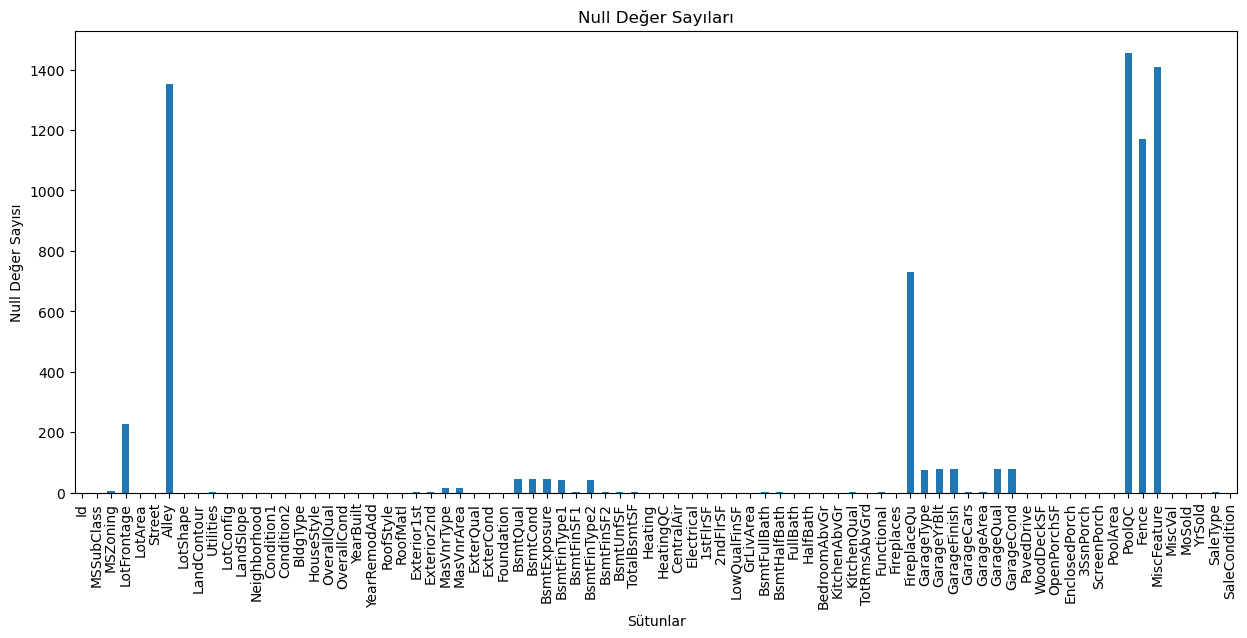

In [34]:
null_degerler_test = test.isnull().sum()
# Null değer sayılarını çubuk grafik olarak çizin
fig, ax = plt.subplots(figsize=(15, 6))
null_degerler_test.plot(kind='bar')
plt.title('Null Değer Sayıları')
plt.xlabel('Sütunlar')
plt.ylabel('Null Değer Sayısı')
plt.show()

In [35]:
test.drop(["PoolQC","MiscFeature","Fence","Alley","FireplaceQu"], axis=1, inplace=True)

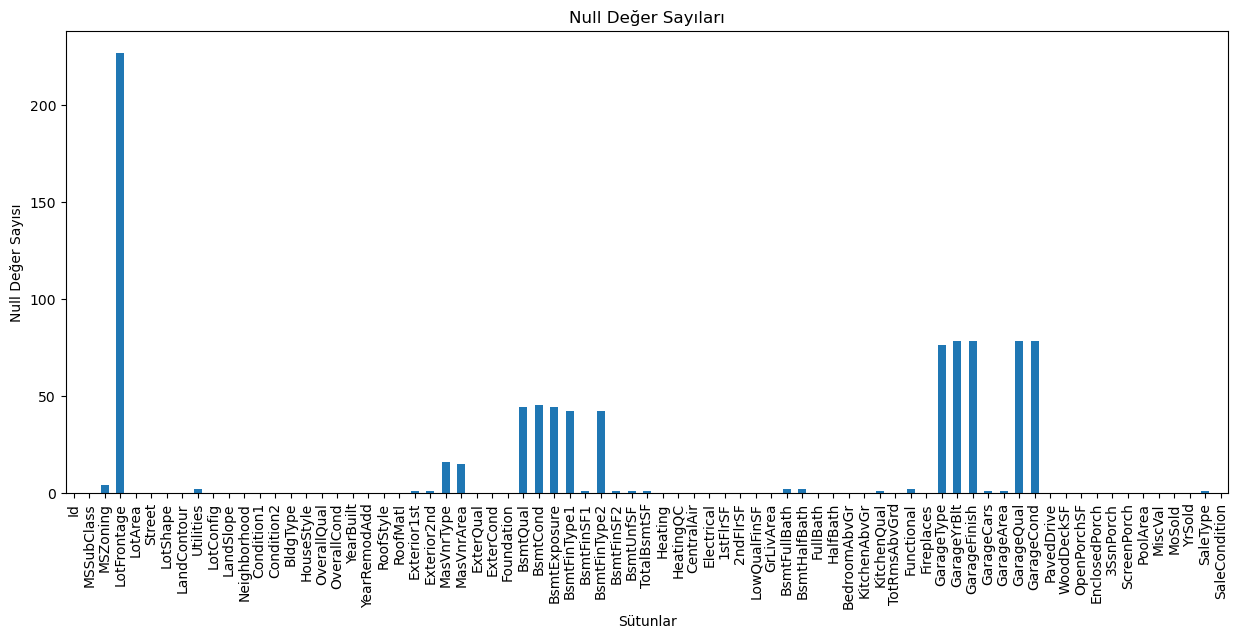

In [36]:
null_degerler_test = test.isnull().sum()
# Null değer sayılarını çubuk grafik olarak çizin
fig, ax = plt.subplots(figsize=(15, 6))
null_degerler_test.plot(kind='bar')
plt.title('Null Değer Sayıları')
plt.xlabel('Sütunlar')
plt.ylabel('Null Değer Sayısı')
plt.show()

In [37]:
null_sutunlar_test = test.columns[test.isnull().any()]
test[null_sutunlar_test].isnull().sum()

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

In [38]:
test[null_sutunlar_test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   LotFrontage   1232 non-null   float64
 2   Utilities     1457 non-null   object 
 3   Exterior1st   1458 non-null   object 
 4   Exterior2nd   1458 non-null   object 
 5   MasVnrType    1443 non-null   object 
 6   MasVnrArea    1444 non-null   float64
 7   BsmtQual      1415 non-null   object 
 8   BsmtCond      1414 non-null   object 
 9   BsmtExposure  1415 non-null   object 
 10  BsmtFinType1  1417 non-null   object 
 11  BsmtFinSF1    1458 non-null   float64
 12  BsmtFinType2  1417 non-null   object 
 13  BsmtFinSF2    1458 non-null   float64
 14  BsmtUnfSF     1458 non-null   float64
 15  TotalBsmtSF   1458 non-null   float64
 16  BsmtFullBath  1457 non-null   float64
 17  BsmtHalfBath  1457 non-null   float64
 18  KitchenQual   1458 non-null 

In [39]:
numarik_kolon_test = test[null_sutunlar_test].select_dtypes(include=['number'])
numarik_kolon_test.columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [40]:
test[numarik_kolon_test.columns].isnull().sum()

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [41]:
onceki_deger_doldurma = ["BsmtFullBath", "BsmtHalfBath","GarageCars"]
for i in onceki_deger_doldurma:
    test[i].fillna(method='ffill', inplace=True)

In [42]:
null_sutunlar_test = test.columns[test.isnull().any()]
numarik_kolon_test = test[null_sutunlar_test].select_dtypes(include=['number'])
test[numarik_kolon_test.columns].isnull().sum()

LotFrontage    227
MasVnrArea      15
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
GarageYrBlt     78
GarageArea       1
dtype: int64

In [43]:
for i in numarik_kolon_test.columns:
    ortalama_alma = test[i].mean()
    test[i].fillna(ortalama_alma, inplace=True)

In [44]:
test[numarik_kolon_test.columns].isnull().sum()

LotFrontage    0
MasVnrArea     0
BsmtFinSF1     0
BsmtFinSF2     0
BsmtUnfSF      0
TotalBsmtSF    0
GarageYrBlt    0
GarageArea     0
dtype: int64

In [45]:
null_sutunlar_test = test.columns[test.isnull().any()]

In [46]:
test[null_sutunlar_test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1455 non-null   object
 1   Utilities     1457 non-null   object
 2   Exterior1st   1458 non-null   object
 3   Exterior2nd   1458 non-null   object
 4   MasVnrType    1443 non-null   object
 5   BsmtQual      1415 non-null   object
 6   BsmtCond      1414 non-null   object
 7   BsmtExposure  1415 non-null   object
 8   BsmtFinType1  1417 non-null   object
 9   BsmtFinType2  1417 non-null   object
 10  KitchenQual   1458 non-null   object
 11  Functional    1457 non-null   object
 12  GarageType    1383 non-null   object
 13  GarageFinish  1381 non-null   object
 14  GarageQual    1381 non-null   object
 15  GarageCond    1381 non-null   object
 16  SaleType      1458 non-null   object
dtypes: object(17)
memory usage: 193.9+ KB


In [47]:
for i in null_sutunlar_test:
    test[i].fillna(method='ffill', inplace=True)

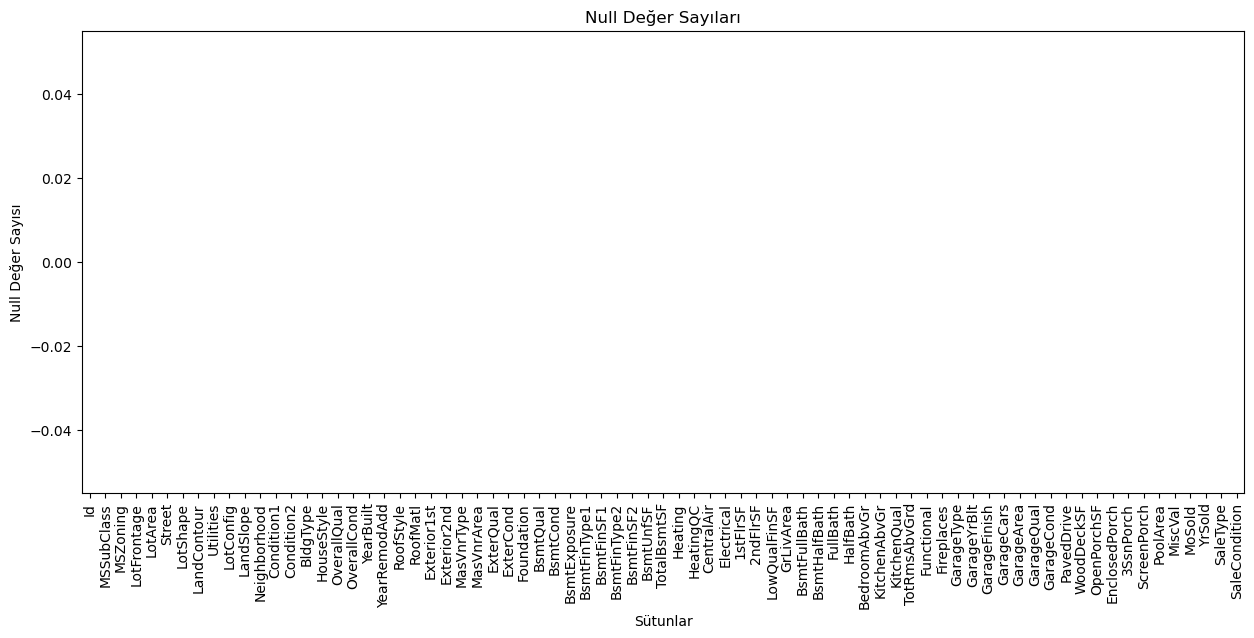

In [48]:
null_degerler_test = test.isnull().sum()
fig, ax = plt.subplots(figsize=(15, 6))
null_degerler_test.plot(kind='bar')
plt.title('Null Değer Sayıları')
plt.xlabel('Sütunlar')
plt.ylabel('Null Değer Sayısı')
plt.show()

In [49]:
test.duplicated().sum()

0

In [50]:
tekrarlanan_kolonlar_test = []
for i in test.columns:
    en_fazla_tekrarlanan_deger = test[i].mode()[0]
    tekrarlanan_oran = test[i].value_counts(normalize=True).max()
    if tekrarlanan_oran > 0.9:
        print(f"'{i}' sütununda 0.9 oranında tekrarlanan değer: {en_fazla_tekrarlanan_deger}")
        tekrarlanan_kolonlar_test.append(i)
    elif tekrarlanan_oran > 0.8:
        print(f"'{i}' sütununda 0.8 oranında tekrarlanan değer: {en_fazla_tekrarlanan_deger}")
        tekrarlanan_kolonlar_test.append(i)

'Street' sütununda 0.9 oranında tekrarlanan değer: Pave
'LandContour' sütununda 0.8 oranında tekrarlanan değer: Lvl
'Utilities' sütununda 0.9 oranında tekrarlanan değer: AllPub
'LandSlope' sütununda 0.9 oranında tekrarlanan değer: Gtl
'Condition1' sütununda 0.8 oranında tekrarlanan değer: Norm
'Condition2' sütununda 0.9 oranında tekrarlanan değer: Norm
'BldgType' sütununda 0.8 oranında tekrarlanan değer: 1Fam
'RoofStyle' sütununda 0.8 oranında tekrarlanan değer: Gable
'RoofMatl' sütununda 0.9 oranında tekrarlanan değer: CompShg
'ExterCond' sütununda 0.8 oranında tekrarlanan değer: TA
'BsmtCond' sütununda 0.9 oranında tekrarlanan değer: TA
'BsmtFinType2' sütununda 0.8 oranında tekrarlanan değer: Unf
'BsmtFinSF2' sütununda 0.8 oranında tekrarlanan değer: 0.0
'Heating' sütununda 0.9 oranında tekrarlanan değer: GasA
'CentralAir' sütununda 0.9 oranında tekrarlanan değer: Y
'Electrical' sütununda 0.9 oranında tekrarlanan değer: SBrkr
'LowQualFinSF' sütununda 0.9 oranında tekrarlanan değer: 0

In [51]:
tekrarlanan_kolonlar_test.remove("RoofStyle")

In [52]:
tekrarlanan_kolonlar_test

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SaleType',
 'SaleCondition']

In [53]:
tekrarlanan_kolonlar_test = [value for value in tekrarlanan_kolonlar_test if value not in values_to_remove]
print(tekrarlanan_kolonlar_test)

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtFinType2', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']


In [54]:
test = test.drop(tekrarlanan_kolonlar_test, axis = 1)

In [55]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Reg,Inside,NAmes,Feedr,1Fam,...,730.0,TA,TA,140,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,IR1,Corner,NAmes,Norm,1Fam,...,312.0,TA,TA,393,36,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,IR1,Inside,Gilbert,Norm,1Fam,...,482.0,TA,TA,212,34,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,IR1,Inside,Gilbert,Norm,1Fam,...,470.0,TA,TA,360,36,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,IR1,Inside,StoneBr,Norm,TwnhsE,...,506.0,TA,TA,0,82,0,1,2010,WD,Normal


# Train Kolon Seçimi

In [56]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,...,TA,TA,0,61,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,...,TA,TA,298,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,...,TA,TA,0,42,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,...,TA,TA,0,35,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,...,TA,TA,192,84,0,12,2008,WD,Normal,250000


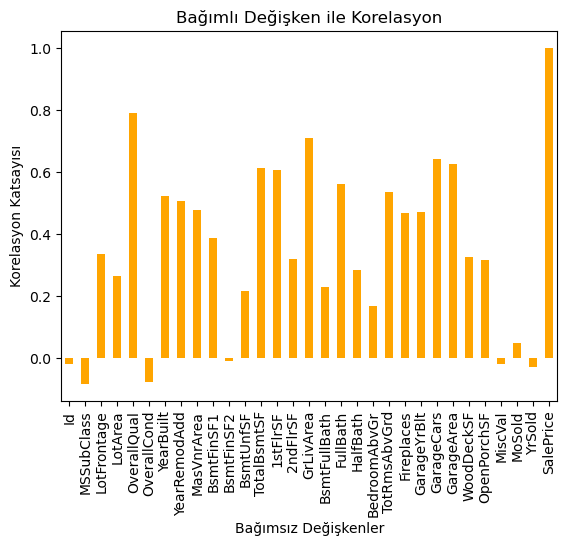

In [57]:
numeric_columns = train.select_dtypes(include=['number'])
korelasyonlar = numeric_columns.corrwith(train["SalePrice"])
korelasyonlar.plot(kind='bar', color = "orange")
plt.title('Bağımlı Değişken ile Korelasyon')
plt.xlabel('Bağımsız Değişkenler')
plt.ylabel('Korelasyon Katsayısı')
plt.show()

In [58]:
correlation_matrix = train.corr()

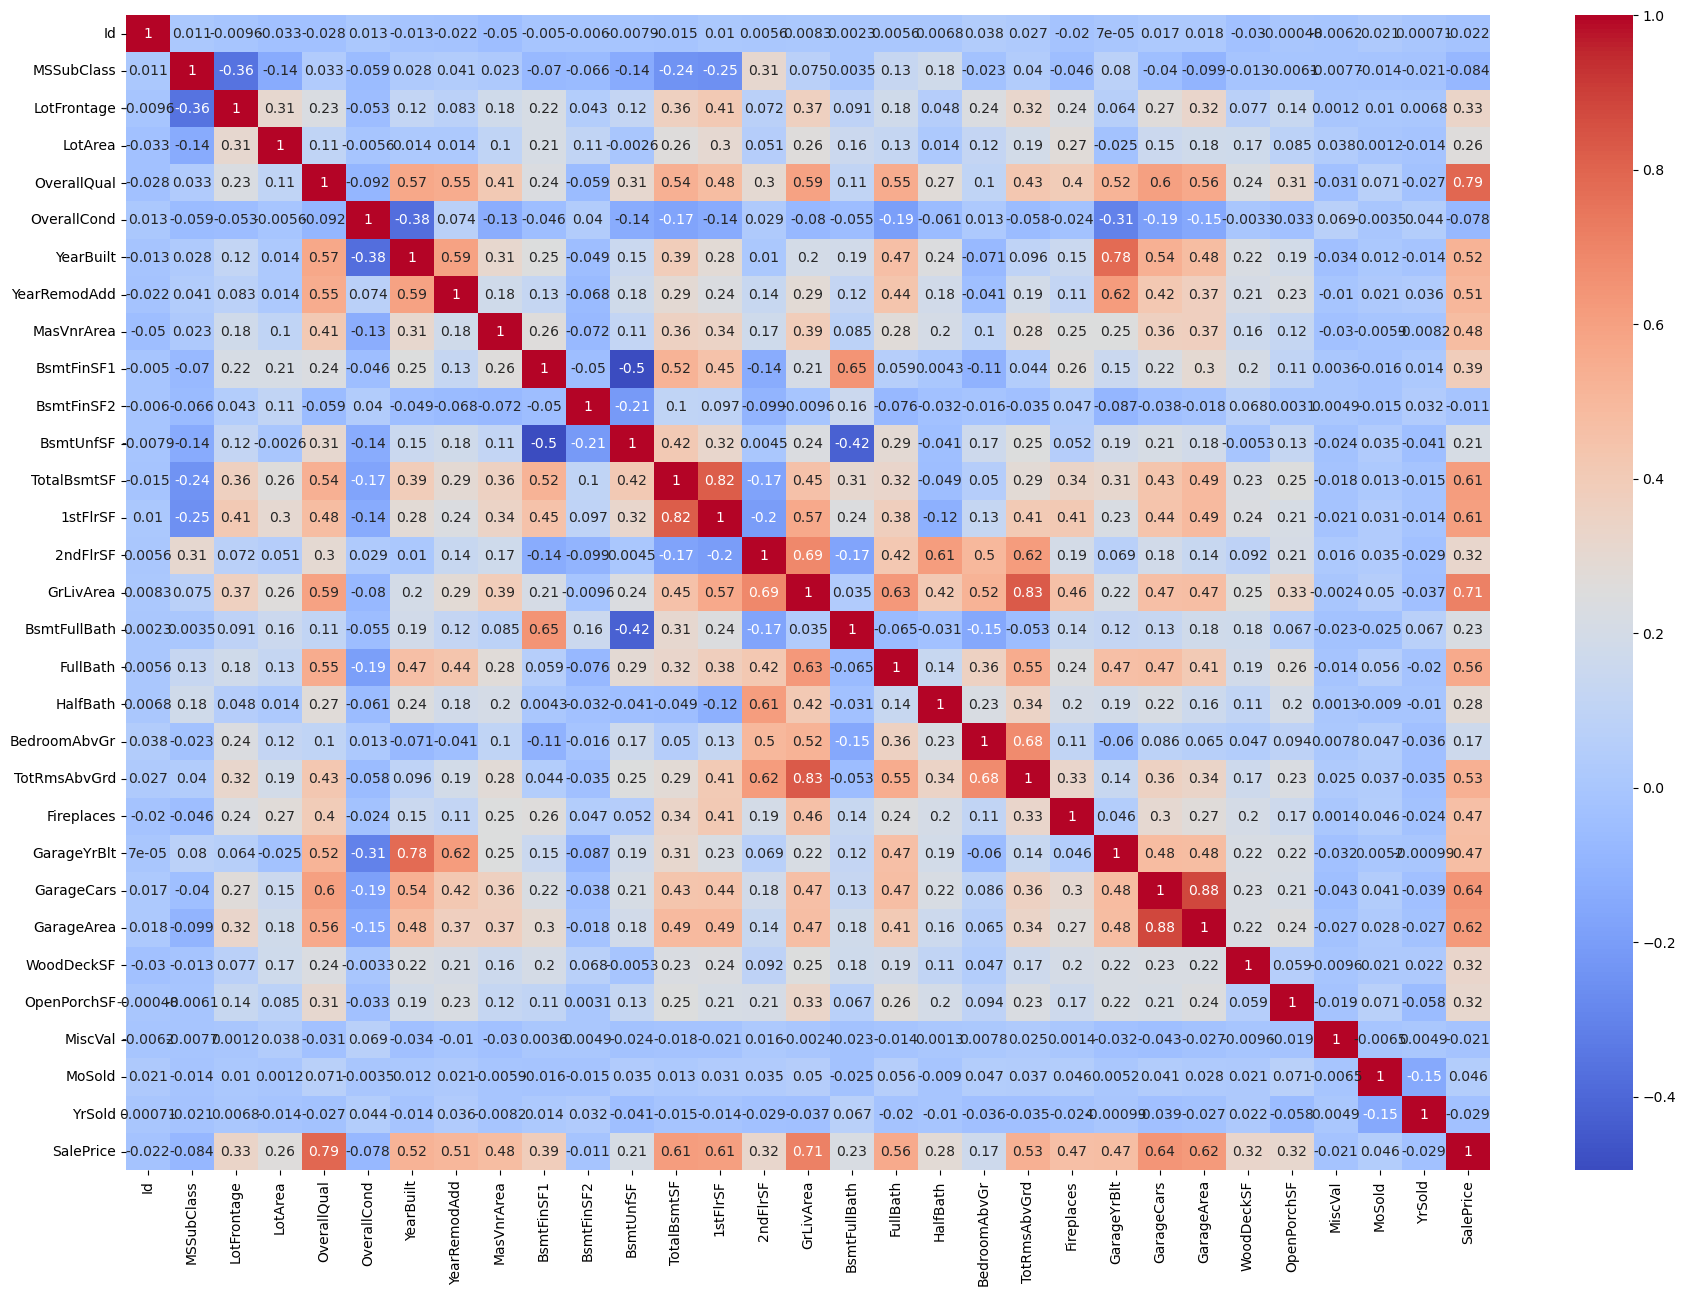

In [59]:
plt.figure(figsize=(22, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [60]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [61]:
dusuk_corr_degerler = ["OverallCond","MoSold","BsmtUnfSF"]
train = train.drop(dusuk_corr_degerler, axis = 1)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,...,548,TA,TA,0,61,0,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,...,460,TA,TA,298,0,0,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,...,608,TA,TA,0,42,0,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,...,642,TA,TA,0,35,0,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,...,836,TA,TA,192,84,0,2008,WD,Normal,250000


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

# Test Kolon Seçimi

In [63]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Reg,Inside,NAmes,Feedr,1Fam,...,730.0,TA,TA,140,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,IR1,Corner,NAmes,Norm,1Fam,...,312.0,TA,TA,393,36,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,IR1,Inside,Gilbert,Norm,1Fam,...,482.0,TA,TA,212,34,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,IR1,Inside,Gilbert,Norm,1Fam,...,470.0,TA,TA,360,36,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,IR1,Inside,StoneBr,Norm,TwnhsE,...,506.0,TA,TA,0,82,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Reg,Inside,MeadowV,Norm,Twnhs,...,0.0,TA,TA,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Reg,Inside,MeadowV,Norm,TwnhsE,...,286.0,TA,TA,0,24,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Reg,Inside,Mitchel,Norm,1Fam,...,576.0,TA,TA,474,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Reg,Inside,Mitchel,Norm,1Fam,...,0.0,TA,TA,80,32,700,7,2006,WD,Normal


In [64]:
test["SalePrice"]=sale_price["SalePrice"].values

In [65]:
test["SalePrice"]= test["SalePrice"].astype(int)

In [66]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Reg,Inside,NAmes,Feedr,1Fam,...,TA,TA,140,0,0,6,2010,WD,Normal,169277
1,1462,20,RL,81.0,14267,IR1,Corner,NAmes,Norm,1Fam,...,TA,TA,393,36,12500,6,2010,WD,Normal,187758
2,1463,60,RL,74.0,13830,IR1,Inside,Gilbert,Norm,1Fam,...,TA,TA,212,34,0,3,2010,WD,Normal,183583
3,1464,60,RL,78.0,9978,IR1,Inside,Gilbert,Norm,1Fam,...,TA,TA,360,36,0,6,2010,WD,Normal,179317
4,1465,120,RL,43.0,5005,IR1,Inside,StoneBr,Norm,TwnhsE,...,TA,TA,0,82,0,1,2010,WD,Normal,150730


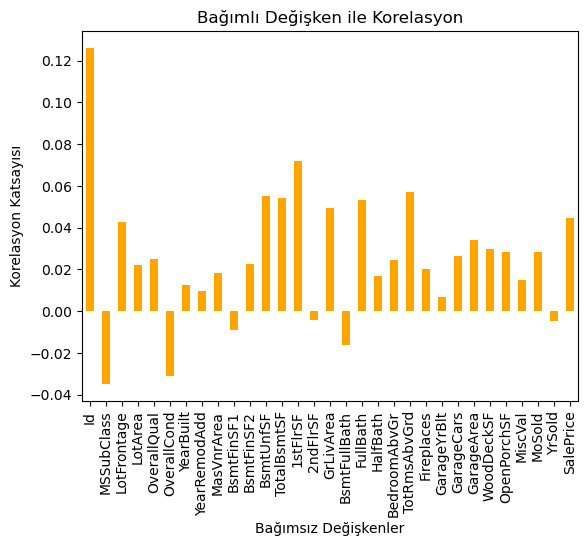

In [67]:
numeric_columns_test = test.select_dtypes(include=['number'])
korelasyonlar_test = numeric_columns.corrwith(test["SalePrice"])
korelasyonlar_test.plot(kind='bar', color = "orange")
plt.title('Bağımlı Değişken ile Korelasyon')
plt.xlabel('Bağımsız Değişkenler')
plt.ylabel('Korelasyon Katsayısı')
plt.show()

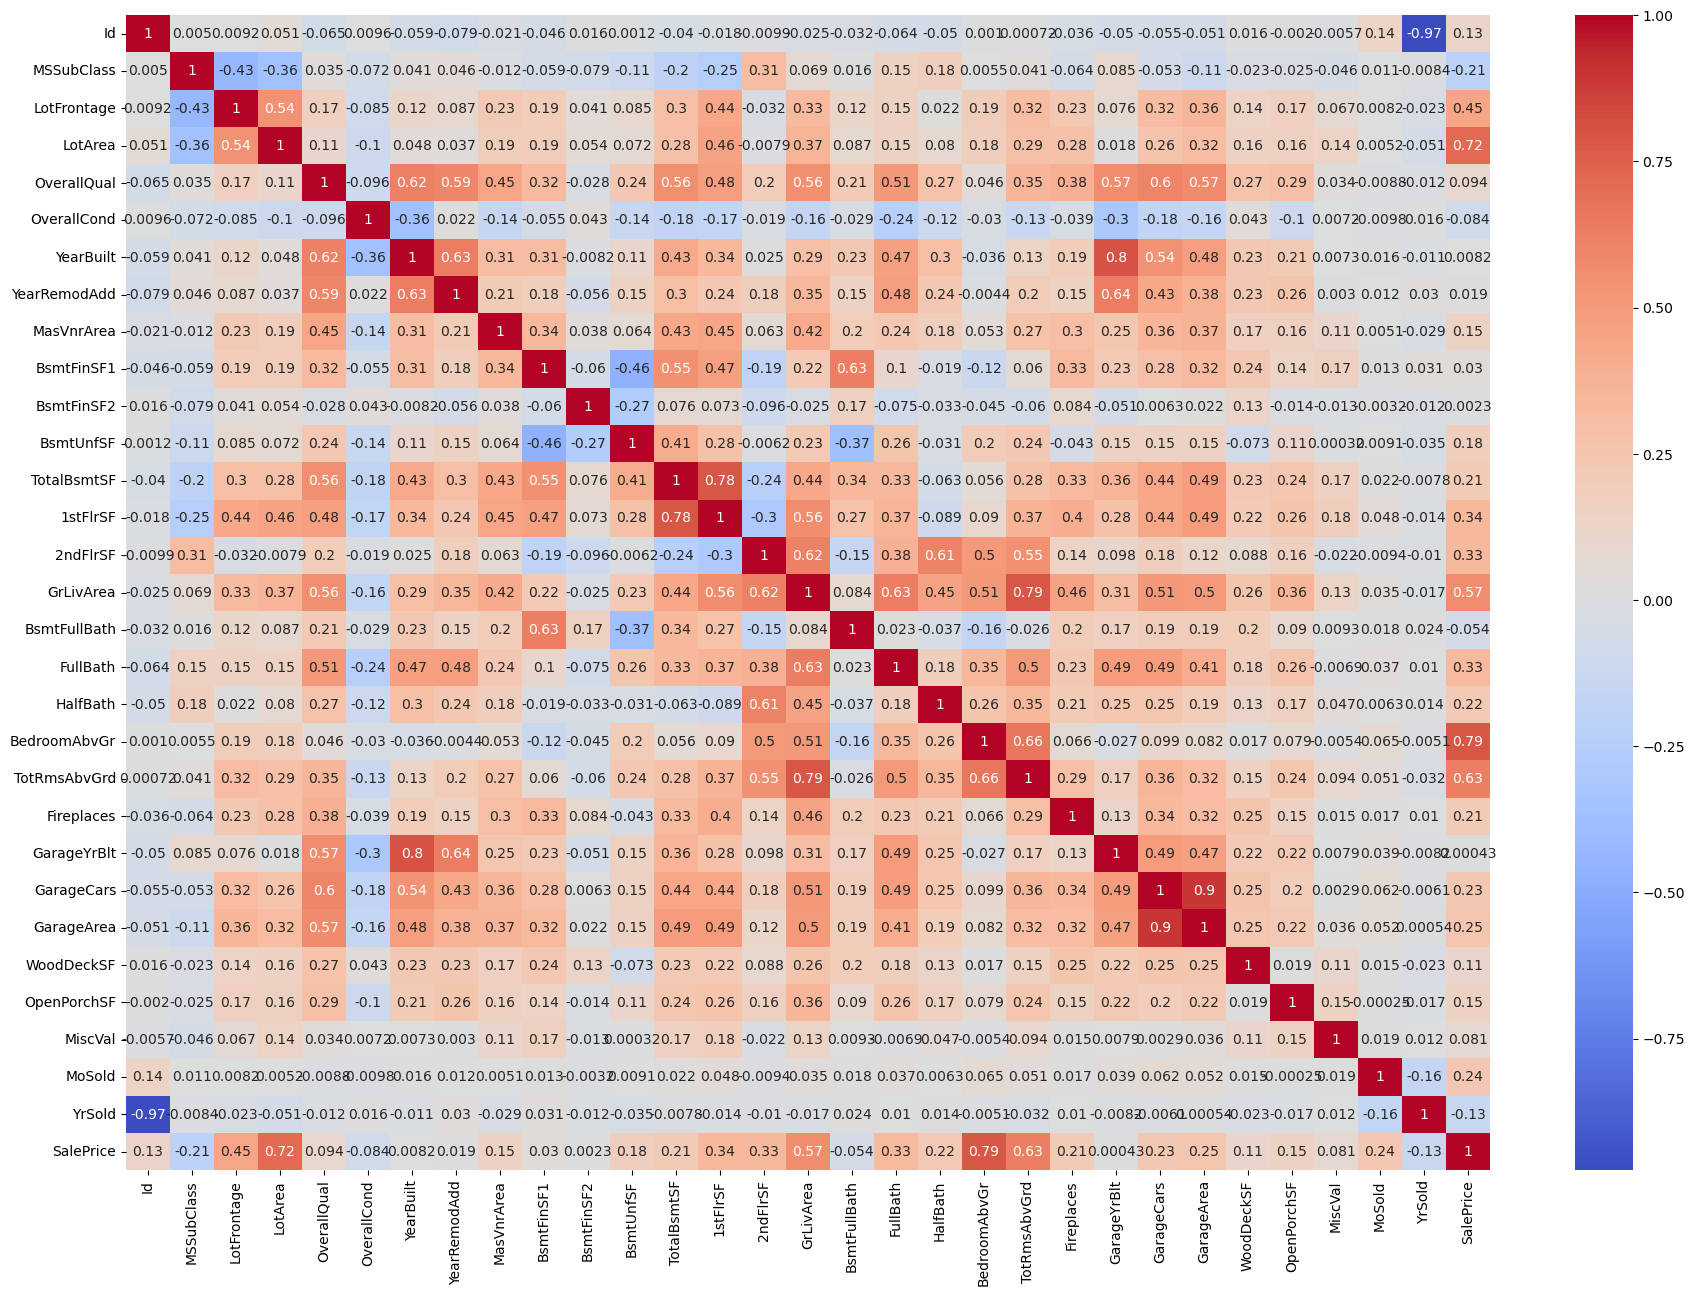

In [68]:
correlation_matrix_test = test.corr()
plt.figure(figsize=(22, 15))
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm')
plt.show()

In [69]:
test = test.drop(dusuk_corr_degerler, axis = 1)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Reg,Inside,NAmes,Feedr,1Fam,...,730.0,TA,TA,140,0,0,2010,WD,Normal,169277
1,1462,20,RL,81.0,14267,IR1,Corner,NAmes,Norm,1Fam,...,312.0,TA,TA,393,36,12500,2010,WD,Normal,187758
2,1463,60,RL,74.0,13830,IR1,Inside,Gilbert,Norm,1Fam,...,482.0,TA,TA,212,34,0,2010,WD,Normal,183583
3,1464,60,RL,78.0,9978,IR1,Inside,Gilbert,Norm,1Fam,...,470.0,TA,TA,360,36,0,2010,WD,Normal,179317
4,1465,120,RL,43.0,5005,IR1,Inside,StoneBr,Norm,TwnhsE,...,506.0,TA,TA,0,82,0,2010,WD,Normal,150730


In [70]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,...,548,TA,TA,0,61,0,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,...,460,TA,TA,298,0,0,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,...,608,TA,TA,0,42,0,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,...,642,TA,TA,0,35,0,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,...,836,TA,TA,192,84,0,2008,WD,Normal,250000


# Kontrol

In [71]:
different_columns = test.columns.difference(train.columns)
different_columns

Index([], dtype='object')

In [72]:
different_columns = train.columns.difference(test.columns)
different_columns

Index([], dtype='object')

In [73]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Reg,Inside,NAmes,Feedr,1Fam,...,730.0,TA,TA,140,0,0,2010,WD,Normal,169277
1,1462,20,RL,81.0,14267,IR1,Corner,NAmes,Norm,1Fam,...,312.0,TA,TA,393,36,12500,2010,WD,Normal,187758
2,1463,60,RL,74.0,13830,IR1,Inside,Gilbert,Norm,1Fam,...,482.0,TA,TA,212,34,0,2010,WD,Normal,183583
3,1464,60,RL,78.0,9978,IR1,Inside,Gilbert,Norm,1Fam,...,470.0,TA,TA,360,36,0,2010,WD,Normal,179317
4,1465,120,RL,43.0,5005,IR1,Inside,StoneBr,Norm,TwnhsE,...,506.0,TA,TA,0,82,0,2010,WD,Normal,150730


In [74]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,...,548,TA,TA,0,61,0,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,...,460,TA,TA,298,0,0,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,...,608,TA,TA,0,42,0,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,...,642,TA,TA,0,35,0,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,...,836,TA,TA,192,84,0,2008,WD,Normal,250000


# Veri Görselleştirme

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

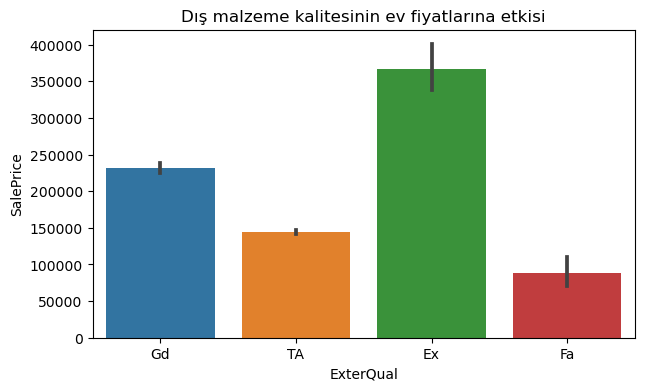

In [76]:
f, ax = plt.subplots(figsize=(7, 4))
sns.barplot(x = "ExterQual", y = "SalePrice", data= train)
plt.title("Dış malzeme kalitesinin ev fiyatlarına etkisi")
plt.show()

In [77]:
train["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

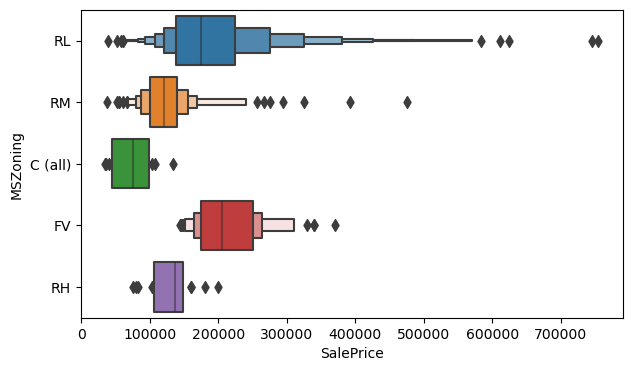

In [78]:
f, ax = plt.subplots(figsize=(7, 4))
sns.boxenplot(data=train, x="SalePrice", y="MSZoning")
plt.show()

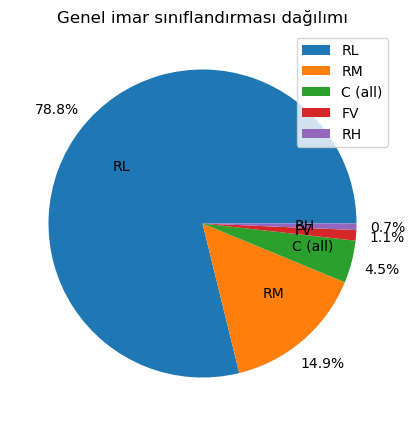

In [79]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(train["MSZoning"].value_counts(),labels = train["MSZoning"].unique(),autopct='%1.1f%%',pctdistance=1.2, labeldistance=.6)
plt.title("Genel imar sınıflandırması dağılımı")
plt.legend()
plt.show()

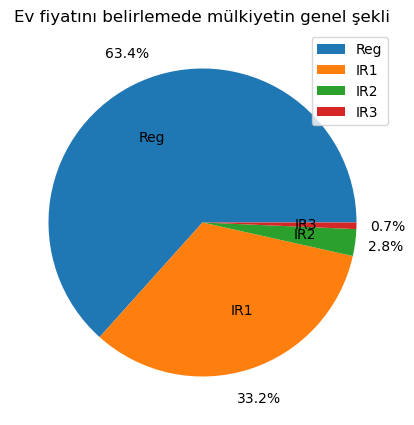

In [80]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(train["LotShape"].value_counts(),labels = train["LotShape"].unique(),autopct='%1.1f%%',pctdistance=1.2, labeldistance=.6)
plt.title("Ev fiyatını belirlemede mülkiyetin genel şekli")
plt.legend()
plt.show()

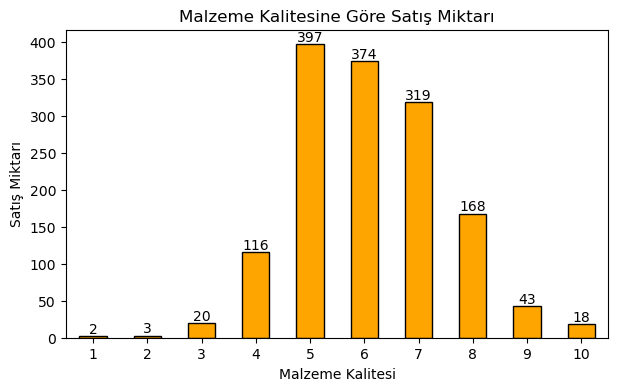

In [81]:
f, ax = plt.subplots(figsize=(7, 4))
grafik = train["OverallQual"].value_counts().sort_index().plot(kind='bar', color='orange', edgecolor='black')
grafik.set_title("Malzeme Kalitesine Göre Satış Miktarı")
grafik.set_xlabel("Malzeme Kalitesi")
grafik.set_ylabel("Satış Miktarı")
plt.xticks(rotation=0) 
for i in grafik.patches:
    grafik.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
plt.show()

# RFR İLE ANALİZ

In [82]:
X_train = train.iloc[:,:39]
y_train = train.iloc[:,-1:]
X_test = test.iloc[:,:39]
y_test = test.iloc[:,-1:]

In [83]:
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [84]:
X_test, _, y_test, _ = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

In [85]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr
135,136,20,RL,80.0,10400,Reg,Inside,NWAmes,Norm,1Fam,...,GasA,Gd,Y,1682,0,1682,0,2,0,3
1452,1453,180,RM,35.0,3675,Reg,Inside,Edwards,Norm,TwnhsE,...,GasA,Gd,Y,1072,0,1072,1,1,0,2
762,763,60,FV,72.0,8640,Reg,Inside,Somerst,Norm,1Fam,...,GasA,Ex,Y,764,783,1547,0,2,1,3
932,933,20,RL,84.0,11670,IR1,Corner,Somerst,RRNn,1Fam,...,GasA,Ex,Y,1905,0,1905,0,2,0,3
435,436,60,RL,43.0,10667,IR2,CulDSac,CollgCr,PosN,1Fam,...,GasA,Ex,Y,827,834,1661,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,IR1,Inside,CollgCr,Norm,1Fam,...,GasA,Gd,Y,1314,0,1314,0,2,0,3
1130,1131,50,RL,65.0,7804,Reg,Inside,SWISU,Norm,1Fam,...,GasA,TA,Y,1328,653,1981,1,2,0,4
1294,1295,20,RL,60.0,8172,Reg,Inside,Edwards,Norm,1Fam,...,GasA,TA,Y,864,0,864,1,1,0,2
860,861,50,RL,55.0,7642,Reg,Corner,Crawfor,Norm,1Fam,...,GasA,Gd,Y,912,514,1426,0,1,1,3


In [86]:
y_train.head()

,SalePrice
135,174000
1452,145000
762,215200
932,320000
435,212000


In [87]:
X_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr
135,1596,50,RL,78.000000,10452,IR1,Inside,Crawfor,Norm,1Fam,...,GasA,Ex,Y,1225,908,2133,1.0,1,1,4
1451,2912,20,RL,80.000000,13384,Reg,Inside,Mitchel,Norm,1Fam,...,GasA,Fa,Y,1360,0,1360,1.0,1,0,3
1046,2507,20,RL,93.000000,10481,IR1,Inside,CollgCr,Norm,1Fam,...,GasA,Ex,Y,2140,0,2140,0.0,2,1,3
691,2152,30,RL,85.000000,19550,Reg,Inside,Edwards,Norm,1Fam,...,GasA,Ex,Y,1518,0,1518,1.0,1,0,2
435,1896,50,RL,45.000000,8212,Reg,Inside,Edwards,Norm,1Fam,...,GasA,Ex,Y,854,444,1298,0.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2556,20,RL,60.000000,8172,Reg,Inside,Edwards,Norm,1Fam,...,GasA,TA,Y,768,0,768,0.0,1,0,2
1130,2591,20,RL,149.000000,19958,Reg,Inside,Timber,Norm,1Fam,...,GasA,Gd,Y,2279,0,2279,0.0,2,1,4
1294,2755,50,RL,50.000000,7500,Reg,Inside,NAmes,Norm,1Fam,...,GasA,Ex,Y,900,412,1312,0.0,1,1,3
860,2321,120,RL,68.580357,3621,Reg,Inside,Blmngtn,Norm,TwnhsE,...,GasA,Ex,Y,1589,0,1589,1.0,2,0,2


In [88]:
y_test.head()

,SalePrice
135,194631
1451,188506
1046,183000
691,181150
435,180054


In [89]:
kukla_değişkenler=X_train.select_dtypes(include='object').columns
kukla_değişkenler = list(kukla_değişkenler)
kukla_değişkenler

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'CentralAir']

In [90]:
#4.e.Kukla Değişken İşlemleri (Dummy Variable)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first')
ohe.fit(X_train[kukla_değişkenler])

def get_ohe(df):
    temp_df = pd.DataFrame(data=ohe.transform(df[kukla_değişkenler]), columns=ohe.get_feature_names_out())
    df.drop(columns=kukla_değişkenler, axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

X_train = get_ohe(X_train)
X_test = get_ohe(X_test)

In [91]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y
0,136,20,80.0,10400,7,1970,1970,288.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1453,180,35.0,3675,5,2005,2005,80.0,547,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,763,60,72.0,8640,7,2009,2009,0.0,24,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,933,20,84.0,11670,9,2006,2006,302.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,436,60,43.0,10667,7,1996,1996,0.0,385,344,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [92]:
X_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y
0,1596,50,78.0,10452,7,1941,1985,371.0,426.0,252.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2912,20,80.0,13384,5,1969,1979,194.0,119.0,344.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2507,20,93.0,10481,8,2006,2007,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2152,30,85.0,19550,5,1940,2007,0.0,1035.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1896,50,45.0,8212,5,1941,1950,0.0,626.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [93]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state = 42)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [94]:
print (f'Train Accuracy - : {rf_reg.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_reg.score(X_test,y_test):.3f}')

Train Accuracy - : 0.976
Test Accuracy - : -15.584


In [95]:
y_predict_train = rf_reg.predict(X_train)
# Predict the labels of test set
y_predict_test = rf_reg.predict(X_test)

In [96]:
print("Mean Absolute Error Train:", metrics.mean_absolute_error(y_train, y_predict_train))
print("Mean Squared Error Train:", metrics.mean_squared_error(y_train, y_predict_train))
print("Root Mean Squared Error Train:", np.sqrt(metrics.mean_squared_error(y_train, y_predict_train)))

Mean Absolute Error Train: 6982.8067416829745
Mean Squared Error Train: 143879408.6107774
Root Mean Squared Error Train: 11994.974306382544


In [97]:
print("Mean Absolute Error Test:", metrics.mean_absolute_error(y_test, y_predict_test))
print("Mean Squared Error Test:", metrics.mean_squared_error(y_test, y_predict_test))
print("Root Mean Squared Error Test:", np.sqrt(metrics.mean_squared_error(y_test, y_predict_test)))

Mean Absolute Error Test: 53356.37274240941
Mean Squared Error Test: 4732199077.657849
Root Mean Squared Error Test: 68790.9810778844


In [98]:
feature_imp = pd.DataFrame(rf_reg.feature_importances_,index=X_train.columns,columns=['Features'])

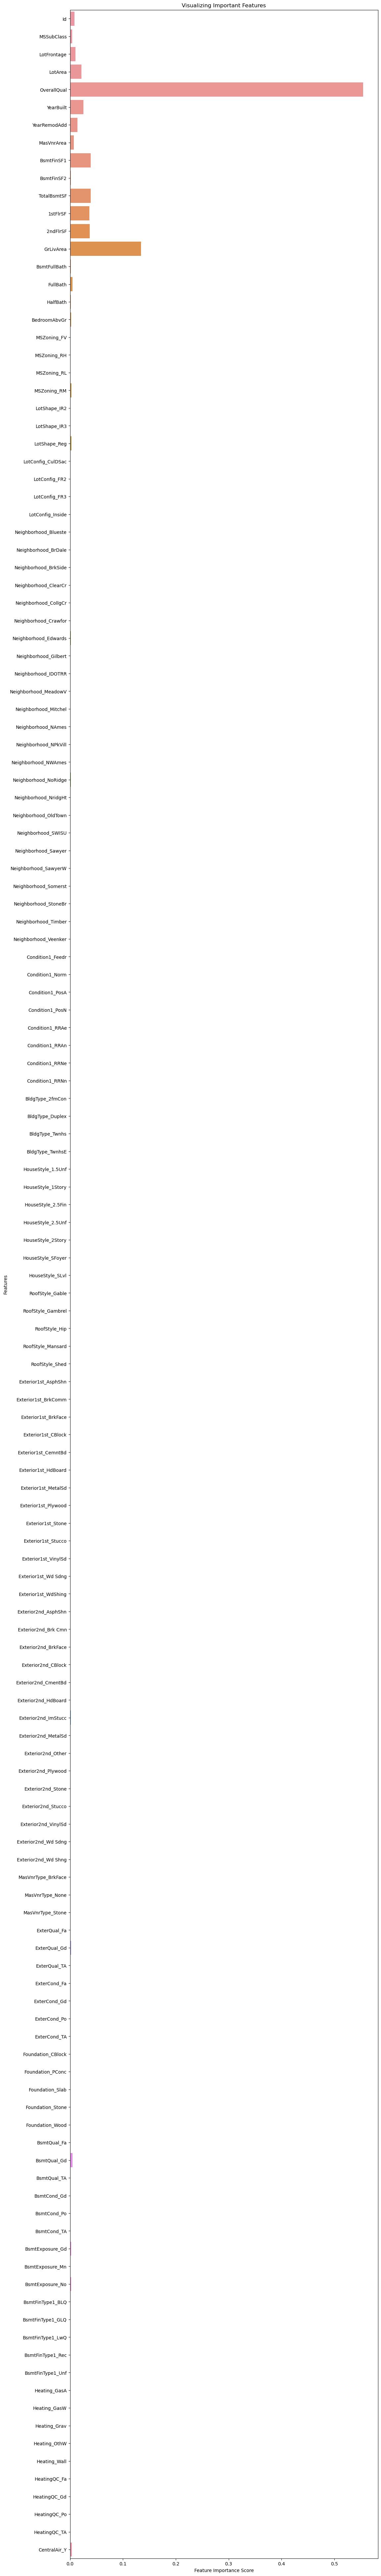

In [99]:
# Add labels to your graph
fig,ax = plt.subplots(figsize=(12,100))
# Creating a bar plot
sns.barplot(x=feature_imp['Features'], y=feature_imp.index,ax=ax)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

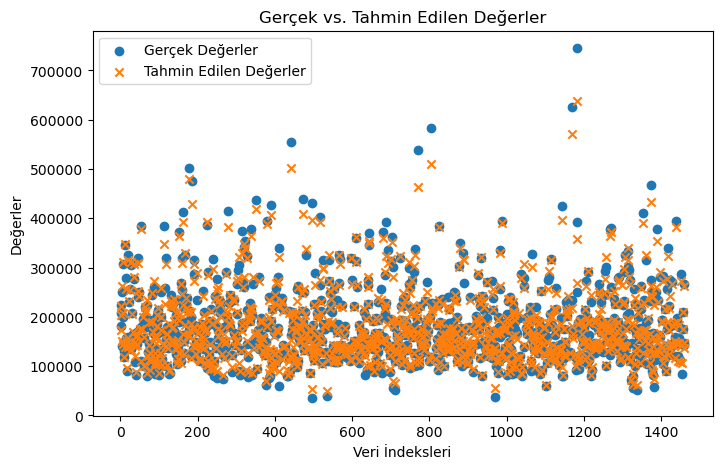

In [100]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train.iloc[:,0],y_train,label='Gerçek Değerler', marker='o')
plt.scatter(X_train.iloc[:,0],y_predict_train, label='Tahmin Edilen Değerler', marker='x')
plt.xlabel('Veri İndeksleri')
plt.ylabel('Değerler')
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.legend()
plt.show()

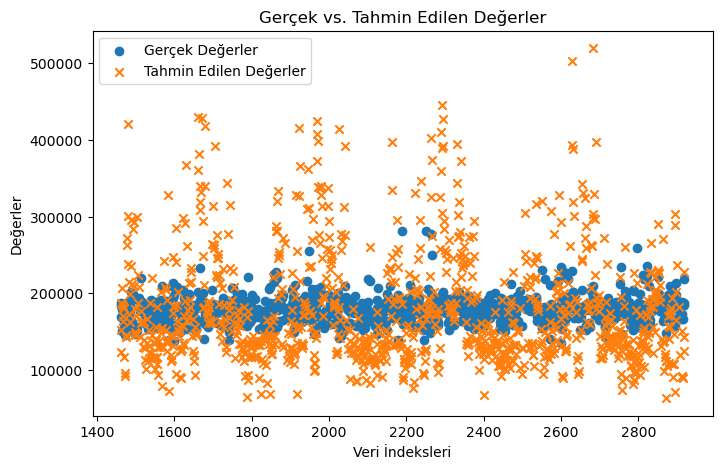

In [101]:
plt.figure(figsize=(8, 5))
plt.scatter(x=X_test.iloc[:,0],y=y_test,label='Gerçek Değerler', marker='o')
plt.scatter(x=X_test.iloc[:,0],y=y_predict_test, label='Tahmin Edilen Değerler', marker='x')
plt.xlabel('Veri İndeksleri')
plt.ylabel('Değerler')
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.legend()
plt.show()

In [113]:
rs_param_grid = {
    'n_estimators': [100,300,500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [42]
}

In [114]:
rf = RandomForestRegressor()

In [115]:
rf_rs = RandomizedSearchCV(
 estimator=rf,
 param_distributions=rs_param_grid, # Number of parameter candidate settings to sample,
 n_iter=10,
 cv = 10, random_state = 42, scoring='neg_mean_squared_error',n_jobs=-1
)

In [116]:
rf_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500],
                                        'random_state': [42]},
                   random_state=42, scoring='neg_mean_squared_error')

In [117]:
print("Best parameters found: ", rf_rs.best_params_)
print("Best performance: ", rf_rs.best_score_)

Best parameters found:  {'random_state': 42, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30}
Best performance:  -1041140470.9442437


In [118]:
print (f'Train Accuracy - : {rf_rs.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_rs.score(X_test,y_test):.3f}')

Train Accuracy - : -231958133.125
Test Accuracy - : -4754792943.753


In [119]:
# Predict the labels of training set
y_predict_train_tuned = rf_rs.predict(X_train)
# Predict the labels of test set
y_predict_test_tuned = rf_rs.predict(X_test)

In [120]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_train, y_predict_train_tuned))
print("Mean Squared Error:", metrics.mean_squared_error(y_train, y_predict_train_tuned))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_train, y_predict_train_tuned)))

Mean Absolute Error: 8284.619890578806
Mean Squared Error: 231958133.12514052
Root Mean Squared Error: 15230.17180222011


In [121]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_predict_test_tuned))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_predict_test_tuned))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_predict_test_tuned)))

Mean Absolute Error: 52825.74966171623
Mean Squared Error: 4754792943.753147
Root Mean Squared Error: 68955.00666197595


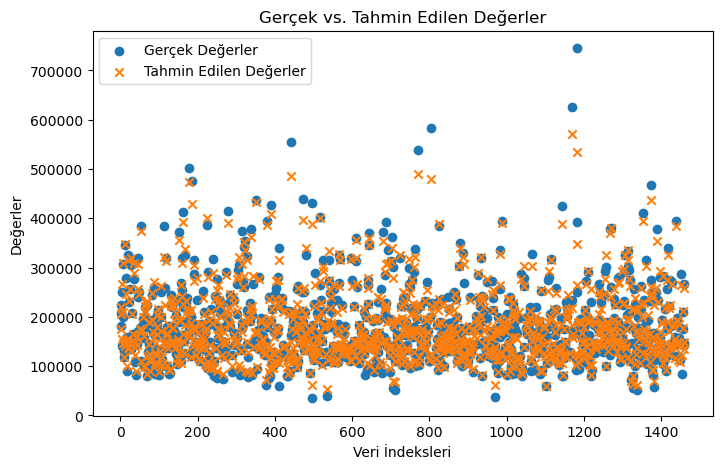

In [122]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train.iloc[:,0],y_train,label='Gerçek Değerler', marker='o')
plt.scatter(X_train.iloc[:,0],y_predict_train_tuned, label='Tahmin Edilen Değerler', marker='x')
plt.xlabel('Veri İndeksleri')
plt.ylabel('Değerler')
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.legend()
plt.show()

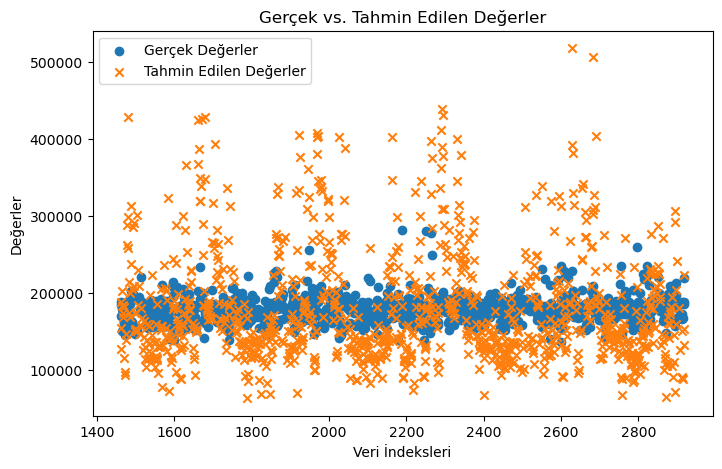

In [123]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test.iloc[:,0],y_test,label='Gerçek Değerler', marker='o')
plt.scatter(X_test.iloc[:,0],y_predict_test_tuned, label='Tahmin Edilen Değerler', marker='x')
plt.xlabel('Veri İndeksleri')
plt.ylabel('Değerler')
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.legend()
plt.show()